In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
from matplotlib import animation
from IPython.display import HTML

In [14]:
directory = ''
file_name = '3d.0000028800.nc'
ds = nc.Dataset(directory + file_name)

In [21]:
# netCDF4 Reference 
ds.__dict__ # metadata as dictionary
ds.dimensions.values()
ds.dimensions['X']
ds['TRAC02']
ds.variables.keys()
''

''

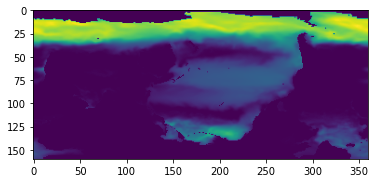

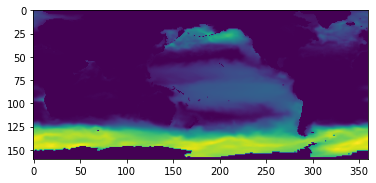

In [29]:
# Static Plot 
nitrogen_data = df['TRAC02'][:]
nitrogen_data_flattened = nitrogen_data[0, 0, :, :]
plt.imshow(nitrogen_data_flattened)
plt.show()

# rotate data 180
plt.imshow(nitrogen_data_flattened[::-1, :])
plt.show()

(1, 23, 160, 360)
(160, 360)


/opt/anaconda3/envs/nc-env/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


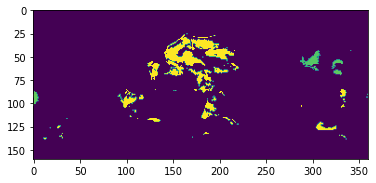

In [28]:
# ANIMATED PLOT nitrogen over depth

# load, flatten, and rotate data
nitrogen_data = ds['TRAC02'][:]
no3_surface_data = nitrogen_data[0,0,:,:] # flatten
no3_surface_data = no3_surface_data[::-1, :] # rotate

fig, ax = plt.subplots()
im = plt.imshow(no3_surface_data, animated=True)

# increase depth with each iteration 
def animate(i):
    no3_slice = nitrogen_data[0, i, :, :][::-1,:]
    im.set_array(no3_slice)
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=nitrogen_data.shape[1])
HTML(anim.to_jshtml()) # display interactive plot 

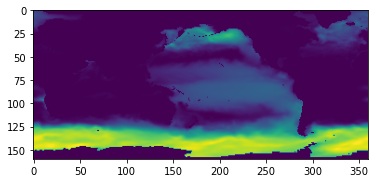

In [42]:
# ANIMATED PLOT Surface Nitrogen over 10 years, each from diffferent file 

# create list of files in order 
from os import listdir 
all_files = listdir('.')
nc_files = [f for f in all_files if '.nc' in f]
nc_files = sorted(nc_files)

# load, flatten, and rotate data
file_name = nc_files[0]
ds = nc.Dataset(file_name)
nitrogen_data = ds['TRAC02'][:]
no3_surface_data = nitrogen_data[0,0,:,:] # flatten
no3_surface_data = no3_surface_data[::-1, :] # rotate

fig, ax = plt.subplots()
im = plt.imshow(no3_surface_data, animated=True)

# load data for next year with each iteration  
def animate(i):
    file_name = nc_files[i]
    ds = nc.Dataset(file_name)
    nitrogen_data = ds['TRAC02'][:]
    no3_slice = nitrogen_data[0, 0, :, :][::-1,:]
    im.set_array(no3_slice)
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=len(nc_files))

# save animation to gif
writergif = animation.PillowWriter(fps=5)
anim.save('nitrogen_over_10yrs.gif', writer=writergif)

HTML(anim.to_jshtml()) # display interactive plot 